In [ ]:
#Exercise 6 (p.170, Chap.4), 8 (p.170, Chap.4), 9 (p.170, Chap.4), 10 (p.171, Chap.4) and 11 (p.171, Chap.4).

# Homework 2 
## Statistical & Machine Learning Approaches for Marketing
### Juliana Sanchez Ramirez#

## Chapter 4
#### Excercise 6
Suppose we collect data for a group of students in a statistics class with variables X1 = hours studied, X2 = undergrad GPA, and Y = receive an A. We fit a logistic regression and produce estimated coefficient, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1

a. Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

In [13]:
B0 =-6
B1 = 0.05
B2 = 1
Prob = 1 / (1 + exp(-1*(B0 + B1*40 + B2*3.5)))
paste0("The probability of receiving an A is: " , Prob)


[1] "The probability of receiving an A is: 0.377540668798145"

b. How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?

0.5 = 1/(1+expˆ-(-6+(0.05*X1)+(1 * 3.5)))

expˆ(-6+(0.05*X1)+(1 * 3.5)) = 1

-6+(0.05*X1)+(1 * 3.5) = Ln (1) = 0
X1 = (6-3.5)*20

X1 = 2.5*20

X1 = 50

#### Answer: The student needs to study 50 hours to have a 50% chance of getting an A in class

### Excercise 8

Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20 % on the training data and 30 % on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18 %. Based on these results, which method should we prefer to use for classification of new observations? Why?

#### Answer: 
In this case the model using 1-nearest neighbors  is taking the closest neighbor in the training data to classify. As a result the error in the training set for this model is 0% (each observation is predicted with the value of the same observation) and the error in the test set has to be 36%. 
According to this analysis the logistic regression is the prefered method to use for classification of new observations.

### Excercise 9

This problem has to do with odds.

(a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

The definition of odds in this case is the propability of not paying the credit card divided by the probability of paying the credit card.

0.37 = p(x) / (1 - p(x))

0.37 * (1-p(x)) = p(x)

0.37 = p(x) + 0.37p(x)

p(x) = 0.37 / 1.37 

p(x) = 0.27

#### Answer: 
On average the people with odds of 0.37 have a probability of default equal to 27%

(b) Suppose that an individual has a 16 % chance of defaulting on her credit card payment. What are the odds that she will default?

 p(x) / (1 - p(x)) = odds
 
 0.16 / (1 - 0.16) = 0.1904
 
 #### Answer:
 The odds that she defaults are 0.19

### Excercise 10

This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.


(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?


In [1]:
library(ISLR)
library(dplyr)
#library("recipes")
#library("caret")
head(Weekly)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [18]:
str(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


In [19]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

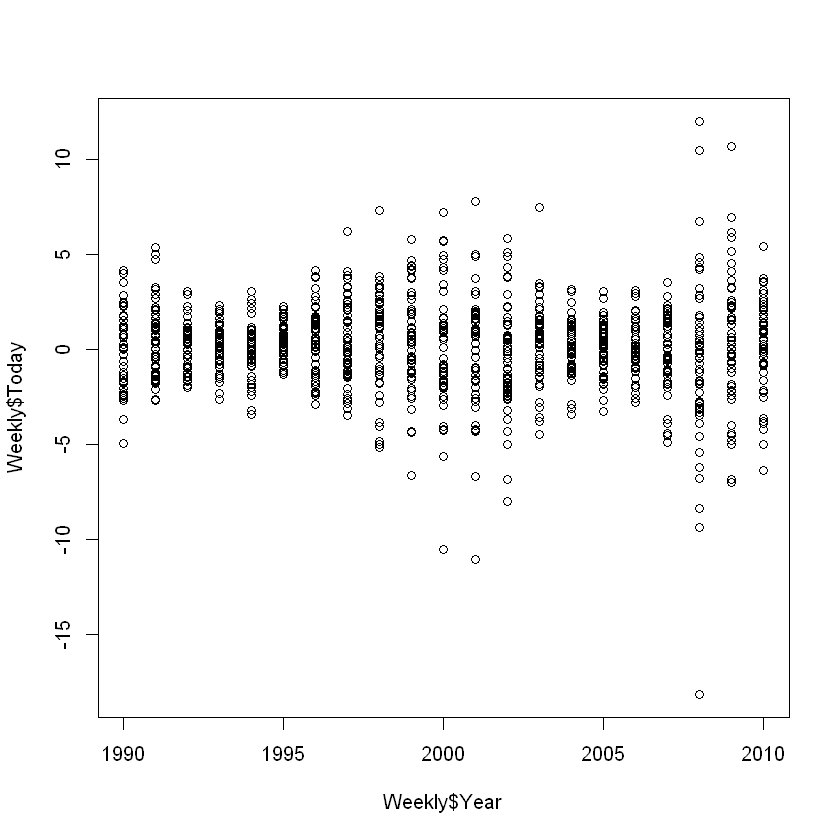

In [21]:
plot(Weekly$Year,Weekly$Today)

It is possible to observe in the dataset that the values of the variable Today correspond to the Percentage return for each week and the lags represent the previous weeks according to the number of lag.
In the plot it is possible to observe that the variance in some years is smaller, i.e. 1995 and 2005 where the percentage of return has values between -4 and 4. 

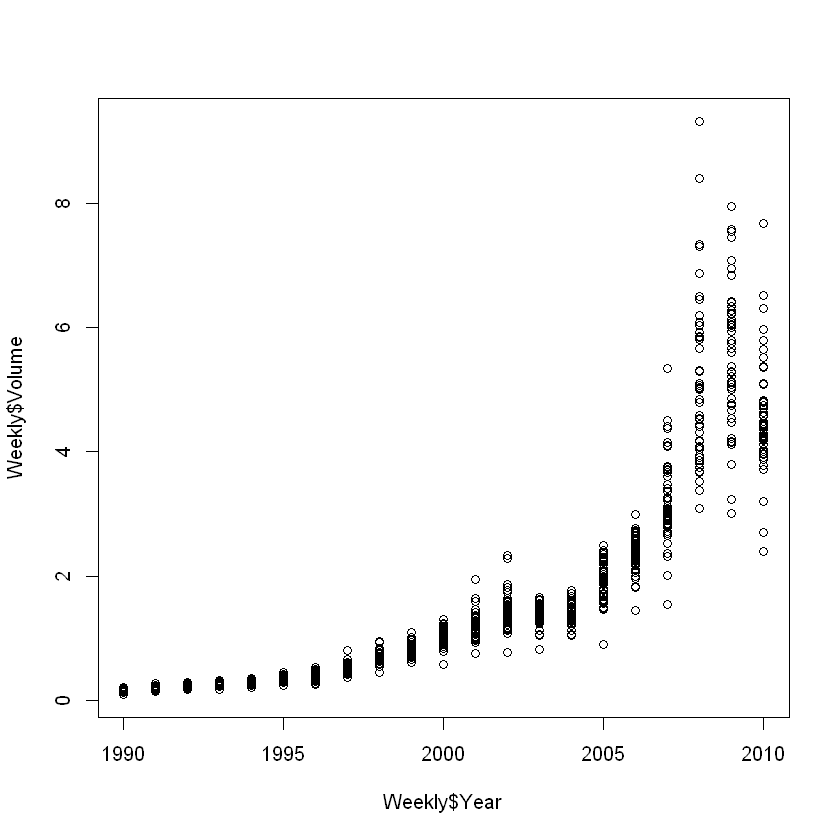

In [34]:
plot(Weekly$Year,Weekly$Volume)

For the variable Volume. It is possible to observe that the average number of daily shares traded increases over the years and also the variance of the volume over the years.

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?


In [4]:
# Train test separate with stratified
set.seed(123)
sample <- sample.int(n = nrow(Weekly), size = floor(.7*nrow(Weekly)), replace = F)
train <- Weekly[sample, ]
test  <- Weekly[-sample, ]

# Encode the response before fiting to Linear Regression model
train_lr <- train
test_lr <- test
train_lr$Direction <- as.numeric(train_lr$Direction) - 1
test_lr$Direction <- as.numeric(test_lr$Direction) - 1

# Fit Linear Regression model
md_lr <- lm(Direction ~ Volume + Lag1+Lag2+Lag3+Lag4+Lag5, data=train_lr)
summary(md_lr)


Call:
lm(formula = Direction ~ Volume + Lag1 + Lag2 + Lag3 + Lag4 + 
    Lag5, data = train_lr)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7112 -0.5385  0.3982  0.4567  0.6309 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.558430   0.025603  21.811   <2e-16 ***
Volume      -0.007773   0.010890  -0.714   0.4756    
Lag1        -0.008217   0.007473  -1.099   0.2719    
Lag2         0.012623   0.007492   1.685   0.0924 .  
Lag3        -0.003206   0.007613  -0.421   0.6738    
Lag4        -0.005895   0.007516  -0.784   0.4331    
Lag5        -0.001917   0.007459  -0.257   0.7973    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4984 on 755 degrees of freedom
Multiple R-squared:  0.007797,	Adjusted R-squared:  -8.854e-05 
F-statistic: 0.9888 on 6 and 755 DF,  p-value: 0.4316


According to the results with a significance of 0.1 the Lag2 is significant for the model

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.


In [5]:
# Predict and evaluate
pred <- predict(md_lr, newdata=test_lr)
head(pred)
summary(pred)

1         3         7         9        12        14 
0.5910121 0.5706082 0.5653351 0.5632508 0.5324974 0.5788341

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4521  0.5209  0.5491  0.5468  0.5691  0.6587 

In [19]:
# Convert probability to class
threshold <- (table(Weekly$Direction) / nrow(Weekly))[2]
# threshold <- 0.1
print(paste0('Decision threshold=', threshold))
pred_lb <- as.numeric(pred >= threshold)

[1] "Decision threshold=0.555555555555556"


In [26]:
# Confusion matrix
label = ifelse(pred_lb == 1, "Up","Down")
confusion_matrix = table(label,test$Direction)
confusion_matrix

      
label  Down  Up
  Down   89 103
  Up     48  87

In [36]:
#Accuracy
(confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)

[1] 0.5382263

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).


In [11]:
train_v2 = Weekly[Weekly$Year <= 2008,]
test_v2 = Weekly[Weekly$Year > 2008,]

In [16]:
# Encode the response before fiting to Linear Regression model
train_lr2 <- train_v2
test_lr2 <- test_v2
train_lr2$Direction <- as.numeric(train_lr2$Direction) - 1
test_lr2$Direction <- as.numeric(test_lr2$Direction) - 1

# Fit Linear Regression model
md_lr_2 <- lm(Direction ~ Lag2, data=test_lr2)
summary(md_lr_2)


Call:
lm(formula = Direction ~ Lag2, data = test_lr2)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7164 -0.5723  0.3484  0.4202  0.5640 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.57899    0.04872  11.883   <2e-16 ***
Lag2         0.02033    0.01581   1.286    0.201    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4933 on 102 degrees of freedom
Multiple R-squared:  0.01596,	Adjusted R-squared:  0.006312 
F-statistic: 1.654 on 1 and 102 DF,  p-value: 0.2013


In [27]:
# Predict and evaluate
pred_2 <- predict(md_lr_2, newdata=test_lr2)
head(pred_2)
summary(pred_2)

986       987       988       989       990       991 
0.5444656 0.7164277 0.4885545 0.4871313 0.5355401 0.5641463

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4360  0.5543  0.5884  0.5865  0.6245  0.7967 

In [28]:
# Convert probability to class
threshold <- (table(Weekly$Direction) / nrow(Weekly))[2]
# threshold <- 0.1
print(paste0('Decision threshold=', threshold))
pred_lb2 <- as.numeric(pred_2 >= threshold)

[1] "Decision threshold=0.555555555555556"


In [35]:
# Confusion matrix
label2 = ifelse(pred_lb2 == 1, "Up","Down")
confusion_matrix2 = table(label2,test_v2$Direction)
confusion_matrix2

      
label2 Down Up
  Down   13 14
  Up     30 47

In [37]:
#Accuracy
(confusion_matrix2[1,1]+confusion_matrix2[2,2])/sum(confusion_matrix2)

[1] 0.5769231

The accuracy of the model increased from 53% to 57% changing the train and test split and using Lag2 as the only predictor

(e) Repeat (d) using LDA.


In [40]:
library(MASS)
md_lda <- lda(Direction ~ Lag2, data=train_lr2)
summary(md_lda)

        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   2      -none- numeric  
scaling 1      -none- numeric  
lev     2      -none- character
svd     1      -none- numeric  
N       1      -none- numeric  
call    3      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

In [41]:
md_lda

Call:
lda(Direction ~ Lag2, data = train_lr2)

Prior probabilities of groups:
        0         1 
0.4477157 0.5522843 

Group means:
         Lag2
0 -0.03568254
1  0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [57]:
# Predict and evaluate
pred_lda <- predict(md_lda, newdata=test_lr2)

# Convert probability to class
threshold <- (table(Weekly$Direction) / nrow(Weekly))[2]
# threshold <- 0.1
print(paste0('Decision threshold=', threshold))

pred_lda2 <- pred_lda$class

# Confusion matrix
label_lda = ifelse(pred_lda2 == 1, "Up","Down")
confusion_matrix_lda = table(pred_lda2,test_v2$Direction)
confusion_matrix_lda

[1] "Decision threshold=0.555555555555556"


         
pred_lda2 Down Up
        0    9  5
        1   34 56

In [58]:
#Accuracy
(confusion_matrix_lda[1,1]+confusion_matrix_lda[2,2])/sum(confusion_matrix_lda)

[1] 0.625

(f) Repeat (d) using QDA.


In [62]:
md_qda <- qda(Direction ~ Lag2, data=train_lr2)
md_qda

Call:
qda(Direction ~ Lag2, data = train_lr2)

Prior probabilities of groups:
        0         1 
0.4477157 0.5522843 

Group means:
         Lag2
0 -0.03568254
1  0.26036581

In [63]:
# Predict and evaluate
pred_qda <- predict(md_qda, newdata=test_lr2)

# Convert probability to class
pred_qda2 <- pred_qda$class

# Confusion matrix
label_qda = ifelse(pred_qda2 == 1, "Up","Down")
confusion_matrix_qda = table(pred_qda2,test_v2$Direction)
confusion_matrix_qda

         
pred_qda2 Down Up
        0    0  0
        1   43 61

In [64]:
#Accuracy
(confusion_matrix_qda[1,1]+confusion_matrix_qda[2,2])/sum(confusion_matrix_qda)

[1] 0.5865385

(g) Repeat (d) using KNN with K = 1.


In [70]:
# Fit the KNN model with the train set using 2 best predictors
library(class)

# k = 1
set.seed(123)
knn1_pred <- knn(train=as.matrix(train_v2[, c('Lag2')]),
                 test=as.matrix(test_v2[, c('Lag2')]),
                 cl=train_v2$Direction,
                 k=1)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, test_v2$Direction)

# Accuracy
acc <- mean(knn1_pred == test_v2$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred Down Up
     Down   21 29
     Up     22 32

[1] "Accuracy = 0.51 %"


(h) Which of these methods appears to provide the best results on this data?


For this data the model with best accuracy is the LDA with a 62% of accuracy

### Excercise 11
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set. 

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and the other Auto variables

In [73]:
df = Auto

In [75]:
median = median(df$mpg)
median

[1] 22.75

In [77]:
df$mpg01 = ifelse(df$mpg>median,1,0)

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.


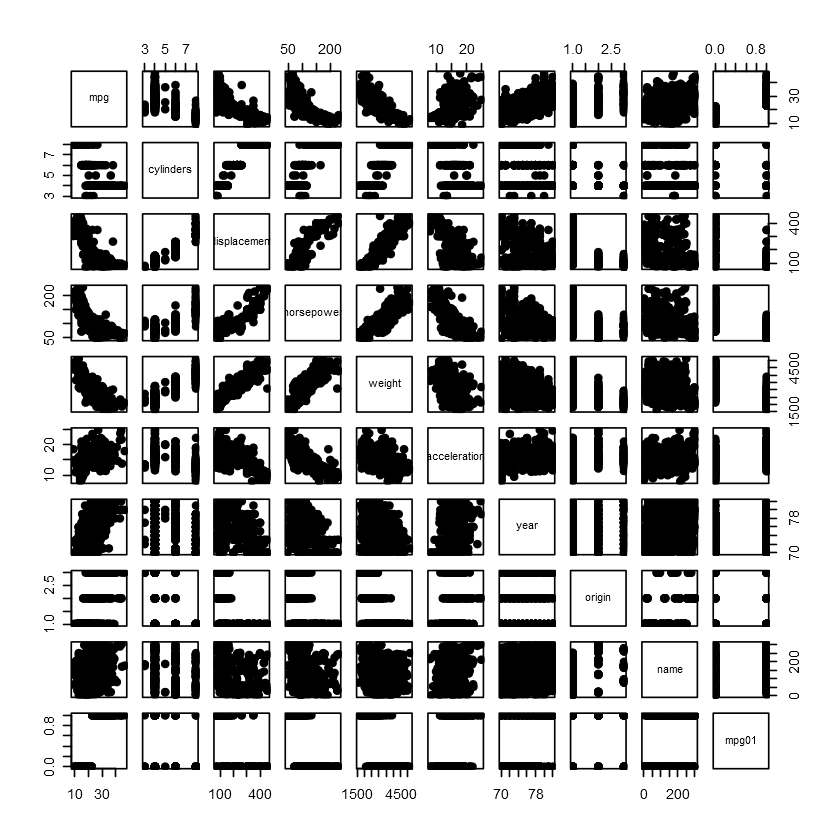

In [86]:
pairs(df, pch = 19)

(c) Split the data into a training set and a test set.


In [87]:
# Train test separate with stratified
set.seed(123)
sample <- sample.int(n = nrow(df), size = floor(.7*nrow(df)), replace = F)
train_auto <- df[sample, ]
test_auto  <- df[-sample, ]


(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in


In [96]:
# Fit LDA model
md_lda <- lda(mpg01 ~ origin+displacement, data=train_auto)
md_lda

Call:
lda(mpg01 ~ origin + displacement, data = train_auto)

Prior probabilities of groups:
        0         1 
0.4963504 0.5036496 

Group means:
    origin displacement
0 1.139706     275.2941
1 1.956522     114.5290

Coefficients of linear discriminants:
                    LD1
origin        0.2218213
displacement -0.0136110

(b). What is the test error of the model obtained?


(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?


(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?


(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?